# Data Download

In [35]:
import kagglehub
import os
import numpy as np
import pandas as pd
data_dir = kagglehub.dataset_download("parisrohan/credit-score-classification")

train_path = os.path.join(data_dir, 'train.csv')
test_path = os.path.join(data_dir, 'test.csv')

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

Train shape: (100000, 28)
Test shape: (50000, 27)


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# EDA

In [37]:
df_train.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
14082,0x6884,CUS_0x5c1f,March,Tetsushih,54,776-09-6859,Architect,58885.7,NaN,1,...,Good,415.3,36.336,23 Years and 10 Months,No,105.755,546.6262169082412,Low_spent_Small_value_payments,103.23287025051592,Good
80553,0x1edff,CUS_0x85a0,February,Rhys Jonesi,39,980-03-3367,Entrepreneur,86571.09,7370.257,0,...,Good,1350.49,31.693,18 Years and 11 Months,No,0.000,465.1217062063829,Low_spent_Small_value_payments,561.9040437936171,Good
26394,0xb0a8,CUS_0x8225,March,Sarmientop,32,355-03-6809,Doctor,26992.21,2181.351,8,...,_,865.86,34.523,25 Years and 1 Months,No,45.000,52.416534633743346,High_spent_Large_value_payments,360.7182292043103,Good
32536,0xd4a6,CUS_0x4779,January,Lukel,15,448-73-9626,Teacher,16744.76,NaN,10,...,Standard,2660.39,28.973,12 Years and 10 Months,Yes,84.573,34.46401971634769,Low_spent_Large_value_payments,275.50267885057394,Poor
47736,0x12db6,CUS_0x4adc,January,riane,35,392-99-5218,Writer,20295.67,1473.306,10,...,Bad,2103.83,37.495,19 Years and 11 Months,Yes,133.101,126.40349588577145,Low_spent_Large_value_payments,157.8259257986415,Poor
98864,0x2594a,CUS_0x5fcb,January,Alwynd,43,928-40-3948,Teacher,17848583.0,2910.238,4,...,Standard,1380.29,39.552,NaN,No,50.282,79.01454639385635,High_spent_Small_value_payments,421.727,Standard
46166,0x12480,CUS_0x6f91,July,Ronaldh,813,466-54-2527,Engineer,7020.545,NaN,5,...,_,1514.13,24.834,15 Years and 3 Months,NM,25.565,31.73475658547124,Low_spent_Small_value_payments,275.8049002037109,Poor
1363,0x1dfd,CUS_0x4948,April,Robinsonc,39,432-73-5991,Media_Manager,64036.88,NaN,8,...,Standard,1635.19,32.859,7 Years and 11 Months,Yes,127.826,297.9761044470015,Low_spent_Medium_value_payments,413.3385008892511,Standard
35851,0xe811,CUS_0x2a45,April,Alexx,18,021-52-4642,Architect,8459.02,997.918,7,...,Standard,789.89,26.701,12 Years and 10 Months,Yes,18.894,89.97967434302223,Low_spent_Medium_value_payments,270.91800207068377,Good
63199,0x1884d,CUS_0x9346,August,Elizabethd,-500,828-89-4293,Doctor,93622.5,7975.875,3,...,Good,142.09,41.298,26 Years and 10 Months,NM,0.000,NaN,!@9#%8,977.1839241791677,Standard


In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [39]:
df_train.duplicated().sum()

np.int64(0)

In [40]:
df_train.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [41]:
df_train.isna().sum()[df_train.isna().sum() > 0]

,0
Name,9985
Monthly_Inhand_Salary,15002
Type_of_Loan,11408
Num_of_Delayed_Payment,7002
Num_Credit_Inquiries,1965
Credit_History_Age,9030
Amount_invested_monthly,4479
Monthly_Balance,1200


In [42]:
cols = [
    'Name',
    'Monthly_Inhand_Salary',
    'Type_of_Loan',
    'Num_of_Delayed_Payment',
    'Num_Credit_Inquiries',
    'Credit_History_Age',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in cols:
    print(f"Уникальные значения в столбце '{col}' (до 30):")
    unique_vals = df_train[col].dropna().unique()[:50]
    print(unique_vals)
    print('-' * 50)


Уникальные значения в столбце 'Name' (до 30):
['Aaron Maashoh' 'Rick Rothackerj' 'Langep' 'Jasond' 'Deepaa' 'Np'
 'Nadiaq' 'Annk' 'Charlie Zhur' 'Jamesj' 'Saphirj' 'Soyoungd'
 'Harriet McLeodd' 'Sinead Carews' 'Poornimaf' 'Chalmersa' 'Parkm'
 'Patrickg' 'Laurence Frosty' 'Reema' 'Mark Felsenthald' 'Lee Chyenz'
 'Nickb' 'McBrideq' 'Rickt' 'Reijik' 'Ashleyk' 'Williamso'
 'Dhanya Skariachano' 'Sarahb' 'Mukhopadhyayc' 'Ayeshaz' 'Lisa Baertleinu'
 'Carlosj' 'Andreas Cremerf' 'Bri' 'ra Alperx' 'Matt Falloonz' 'Lawrencea'
 'Emily Flitterl' 'Nateg' 'Toonkeln' 'Jaisinghanij' 'Pomeroyi'
 'Olivia Oranr' 'Rachelle Younglaic' 'Shupingu' '"John ODonnell"p'
 'Scheydere' 'Nate Raymondj']
--------------------------------------------------
Уникальные значения в столбце 'Monthly_Inhand_Salary' (до 30):
[ 1824.84333333  3037.98666667 12187.22        2612.49083333
  2853.30916667  5988.705      11242.78333333 10469.20775939
  2611.115       9843.8675      2825.23333333  2948.60583333
  7266.68666667  4766.

In [43]:
for df in [df_train, df_test]:
    df.replace('_______' , np.nan, inplace=True)
    df.replace('_', np.nan, inplace=True)
    df.replace('!@9#%8', np.nan, inplace=True)
    df.replace('__10000__', np.nan, inplace=True)

In [44]:
def safe_float_cast(val):
    val_str = str(val).replace("_", "").strip()
    if val_str == "":
        return np.nan
    try:
        return float(val_str)
    except (ValueError, TypeError):
        return np.nan

numeric_cols = [
    'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'
]

for col in numeric_cols:
    df_train[col] = df_train[col].map(safe_float_cast)
    df_test[col] = df_test[col].map(safe_float_cast)


In [45]:
for col in df_train.columns:
    unique_vals = df_train[col].dropna().unique()[:20]
    print(f"Столбец '{col}' — первые 10 уникальных значений:")
    print(unique_vals)
    print('-' * 40)


Столбец 'ID' — первые 10 уникальных значений:
['0x1602' '0x1603' '0x1604' '0x1605' '0x1606' '0x1607' '0x1608' '0x1609'
 '0x160e' '0x160f' '0x1610' '0x1611' '0x1612' '0x1613' '0x1614' '0x1615'
 '0x161a' '0x161b' '0x161c' '0x161d']
----------------------------------------
Столбец 'Customer_ID' — первые 10 уникальных значений:
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x1cdb'
 'CUS_0x95ee' 'CUS_0x284a' 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08'
 'CUS_0xa66b' 'CUS_0xc0ab' 'CUS_0x3e45' 'CUS_0x6c66' 'CUS_0xff4'
 'CUS_0x33d2' 'CUS_0x6070' 'CUS_0xfdb' 'CUS_0x3553' 'CUS_0x4100']
----------------------------------------
Столбец 'Month' — первые 10 уникальных значений:
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
----------------------------------------
Столбец 'Name' — первые 10 уникальных значений:
['Aaron Maashoh' 'Rick Rothackerj' 'Langep' 'Jasond' 'Deepaa' 'Np'
 'Nadiaq' 'Annk' 'Charlie Zhur' 'Jamesj' 'Saphirj' 'Soyoungd'
 'Harriet McLeodd' 'Sinead Carews' '

In [46]:
for i, df in enumerate([df_train, df_test]):
    df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].replace(-1, 1)
    df = df[df['Num_Credit_Card'] <= 15]
    df['Occupation'] = df['Occupation'].fillna('Other')

    if i == 0:
        df_train = df
    else:
        df_test = df

In [47]:
for df in [df_train, df_test]:
    df['Payment_of_Min_Amount'].replace("NM", "No", inplace=True)

    df.drop(df[df['Age'] > 100].index, inplace=True)
    df.drop(df[df['Age'] < 1].index, inplace=True)

    df.loc[df['Num_of_Loan'] < 0, 'Num_of_Loan'] = np.nan
    df.loc[df['Num_of_Loan'] > 9, 'Num_of_Loan'] = np.nan

    df.loc[df['Num_Credit_Card'] > 11, 'Num_Credit_Card'] = np.nan

    df.loc[df['Interest_Rate'] > 34, 'Interest_Rate'] = np.nan

    df.loc[df['Annual_Income'] > 300000, 'Annual_Income'] = np.nan

    df.loc[df['Total_EMI_per_month'] > 5000, 'Total_EMI_per_month'] = np.nan

    df.loc[df['Num_Bank_Accounts'] > 100, 'Num_Bank_Accounts'] = np.nan
    df.loc[df['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = np.nan

    df.loc[df['Num_of_Delayed_Payment'] > 100, 'Num_of_Delayed_Payment'] = np.nan

    df.loc[0, 'Occupation'] = 'Scientist'

    df = df[df['Outstanding_Debt'] <= 1500]

    df = df[df['Monthly_Inhand_Salary'] > 7500]

    df = df[df['Delay_from_due_date'] >= 10]

    df = df[df['Amount_invested_monthly'] > 9000]

In [48]:
df_train.isna().sum()[df_train.isna().sum() > 0]

,0
Name,9487
Annual_Income,945
Monthly_Inhand_Salary,14270
Num_Bank_Accounts,1189
Num_Credit_Card,3
Interest_Rate,1942
Num_of_Loan,4134
Type_of_Loan,10790
Num_of_Delayed_Payment,7351
Changed_Credit_Limit,1999


In [49]:
for df in [df_train, df_test]:
    df["Interest_Rate"].fillna(df["Interest_Rate"].median(), inplace=True)
    df["Num_of_Loan"].fillna(df["Num_of_Loan"].median(), inplace=True)
    df["Total_EMI_per_month"].fillna(df["Total_EMI_per_month"].median(), inplace=True)
    df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True)

In [50]:
columns_to_fill_with_mean = [
    "Changed_Credit_Limit",
    "Monthly_Inhand_Salary",
    "Num_of_Delayed_Payment",
    "Amount_invested_monthly",
    "Monthly_Balance",
    "Num_Credit_Inquiries"
]

for col in columns_to_fill_with_mean:
    df_train[col].fillna(df_train[col].mean(), inplace=True)
    df_test[col].fillna(df_test[col].mean(), inplace=True)

In [51]:
for df in [df_train, df_test]:
    df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].mode()[0], inplace=True)
    df['Num_Credit_Card'].fillna(df['Num_Credit_Card'].mode()[0], inplace=True)
    df["Payment_Behaviour"].fillna(df["Payment_Behaviour"].mode()[0], inplace=True)

In [52]:
for df in [df_train, df_test]:
    mode_creditmix = df.groupby('Customer_ID')["Credit_Mix"].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan
    )
    mode_global = df["Credit_Mix"].mode()[0]

    df["Credit_Mix"] = df["Credit_Mix"].fillna(mode_creditmix.fillna(mode_global))

In [53]:
for df in [df_train, df_test]:
    mode_age = df.groupby('Customer_ID')["Age"].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan
    )
    mode_global = df["Age"].mode()[0]

    df["Age"] = df["Age"].fillna(mode_age.fillna(mode_global))

In [54]:
for df in [df_train, df_test]:
    df.drop(columns=[
        "ID", "Name", "SSN", "Customer_ID"
    ],
            inplace=True)

In [55]:
df_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.000,Scientist,19114.120,1824.843,3.000,4.000,3.000,4.000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.980,26.823,22 Years and 1 Months,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good
1,February,23.000,Scientist,19114.120,4195.301,3.000,4.000,3.000,4.000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.980,31.945,NaN,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good
3,April,23.000,Scientist,19114.120,4195.301,3.000,4.000,3.000,4.000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.980,31.378,22 Years and 4 Months,No,49.575,199.458,Low_spent_Small_value_payments,223.451,Good
4,May,23.000,Scientist,19114.120,1824.843,3.000,4.000,3.000,4.000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.980,24.797,22 Years and 5 Months,No,49.575,41.420,High_spent_Medium_value_payments,341.489,Good
5,June,23.000,Scientist,19114.120,4195.301,3.000,4.000,3.000,4.000,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.980,27.262,22 Years and 6 Months,No,49.575,62.430,Low_spent_Small_value_payments,340.479,Good


# Data Visualization

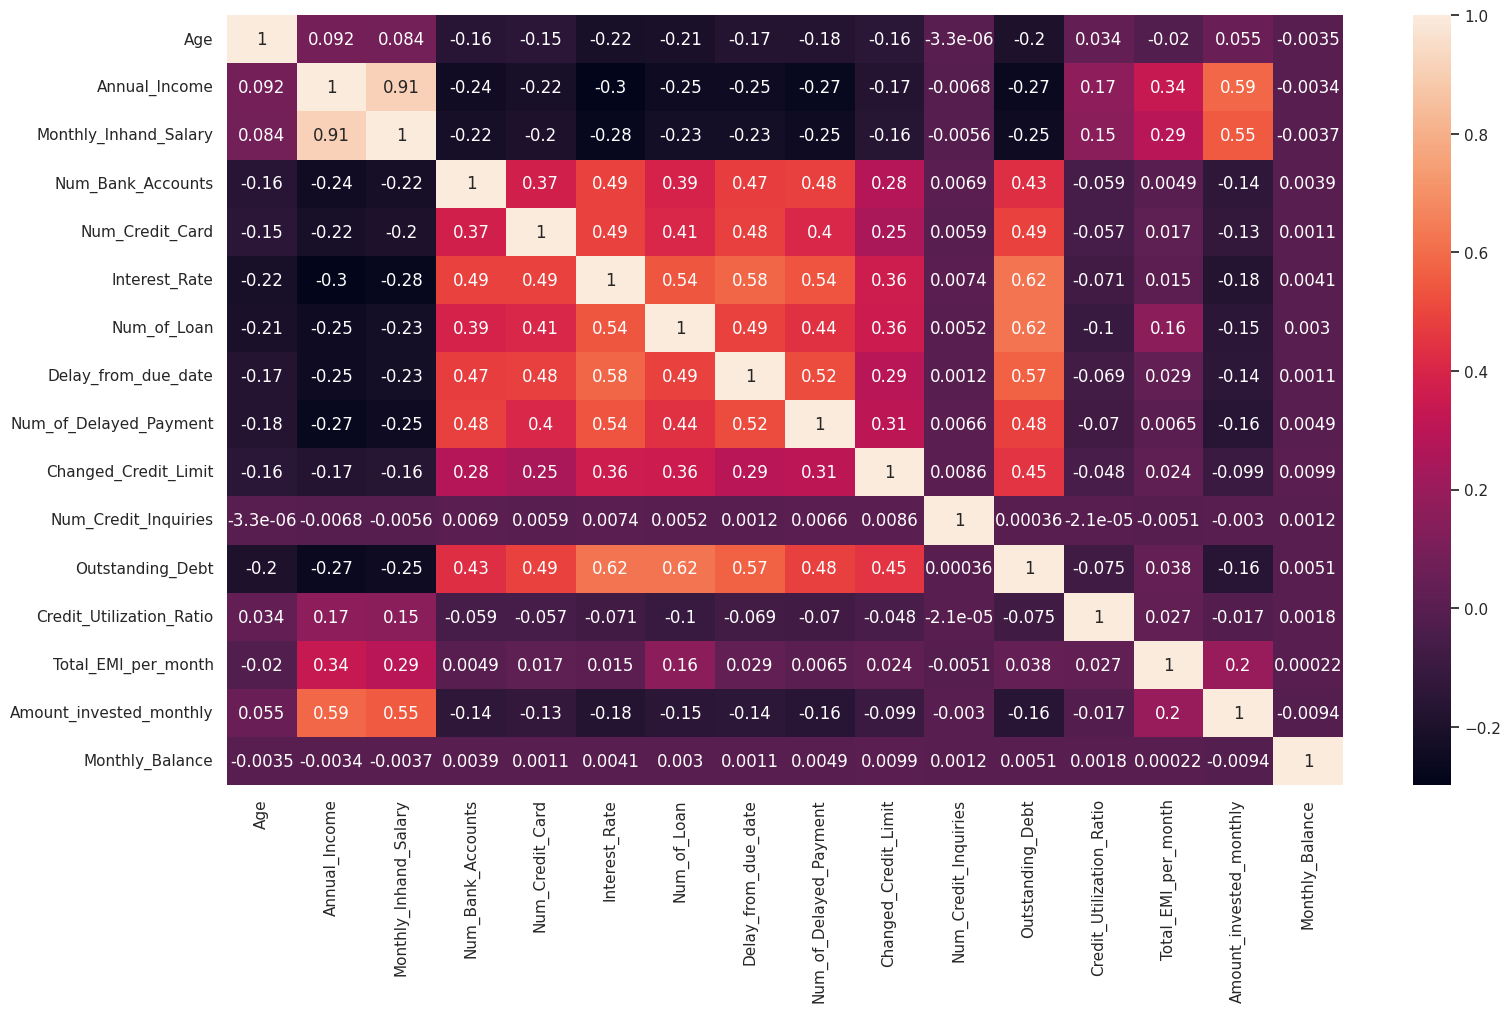

In [56]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True);

In [57]:
px.histogram(df_train, x='Occupation', color='Credit_Score', barmode='group', histfunc='count',
             color_discrete_sequence=px.colors.qualitative.Vivid,
             width=1200, height=500, title='Credit Score Distribution by Occupation')

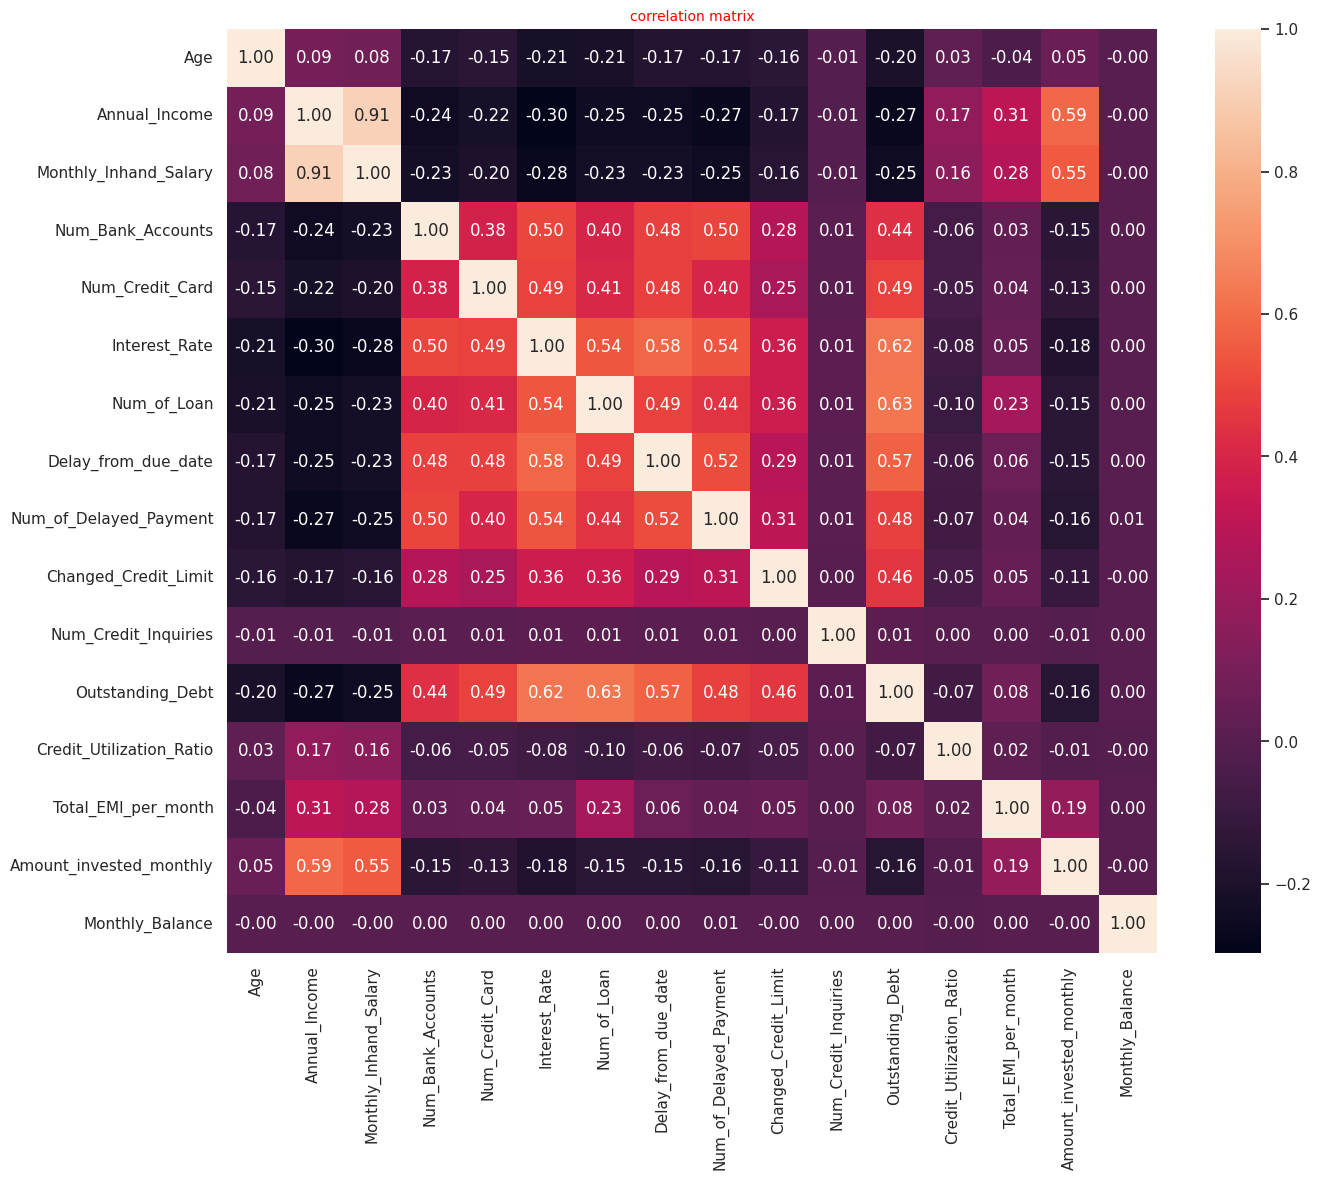

In [58]:
df_corr=df_train.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(15,12))
plt.title("correlation matrix", color="red",fontsize=10)
sns.heatmap(df_corr,annot=True,fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

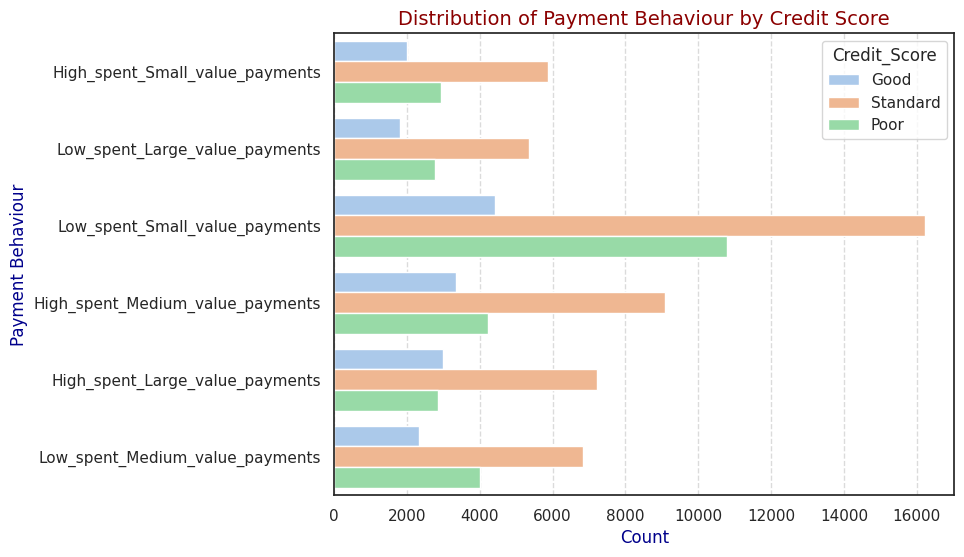

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, y='Payment_Behaviour', hue='Credit_Score', palette='pastel')
plt.title("Distribution of Payment Behaviour by Credit Score", color="darkred", fontsize=14)
plt.ylabel('Payment Behaviour', color="darkblue", fontsize=12)
plt.xlabel('Count', color="darkblue", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [60]:
px.histogram(df_train, x='Age', color='Credit_Score', facet_row='Credit_Score',
             color_discrete_sequence=px.colors.qualitative.Vivid,
             width=1000, height=500, title='Age Distribution by Credit Score')

# Encoding Variables

In [61]:
mapping_mix = {'Bad': 0, 'Standard': 1, 'Good': 2}
mapping_score = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_train['Credit_Mix'] = df_train['Credit_Mix'].map(mapping_mix)
df_test['Credit_Mix'] = df_test['Credit_Mix'].map(mapping_mix)
df_train['Credit_Score'] = df_train['Credit_Score'].map(mapping_score)

In [62]:
payment_behaviour_mapping = {
    'High_spent_Small_value_payments': 0,
    'Low_spent_Large_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Small_value_payments': 3,
    'High_spent_Medium_value_payments': 4,
    'High_spent_Large_value_payments': 5,
}

df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].map(payment_behaviour_mapping)
df_test['Payment_Behaviour'] = df_test['Payment_Behaviour'].map(payment_behaviour_mapping)

In [63]:
mapping = {'No': 0, 'Yes': 1}

df_train['Payment_of_Min_Amount'] = df_train['Payment_of_Min_Amount'].map(mapping)
df_test['Payment_of_Min_Amount'] = df_test['Payment_of_Min_Amount'].map(mapping)

In [64]:
def encode_column(df, column_name):
    df = pd.get_dummies(df, columns=[column_name], drop_first=True)
    return df

df_train = encode_column(df_train, 'Occupation')
df_test = encode_column(df_test, 'Occupation')

In [65]:
for col in ["Type_of_Loan", "Month", "Credit_History_Age"]:
    df_train[col] = df_train[col].fillna("Unknown")
    df_test[col] = df_test[col].fillna("Unknown")

# Model

In [66]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


In [73]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np


X = df_train.drop('Credit_Score', axis=1)
y = df_train['Credit_Score']

cat_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = CatBoostClassifier(
    iterations=8000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=1,
    random_seed=42,
    cat_features=cat_features,
    eval_metric='Accuracy',
    loss_function='MultiClass',
    verbose=100,
    train_dir='catboost_logs',
    task_type="GPU"
)



model.fit(X_train, y_train, eval_set=(X_test, y_test))

y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

print("\n=== Train Metrics ===")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print(f"ROC-AUC (OVR): {roc_auc_score(y_train, y_train_proba, multi_class='ovr'):.4f}")

print("\n=== Test Metrics ===")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(f"ROC-AUC (OVR): {roc_auc_score(y_test, y_test_proba, multi_class='ovr'):.4f}")


0:	learn: 0.6834925	test: 0.6845927	best: 0.6845927 (0)	total: 81.3ms	remaining: 10m 50s
100:	learn: 0.7426264	test: 0.7510524	best: 0.7514208 (92)	total: 4.21s	remaining: 5m 29s
200:	learn: 0.7515063	test: 0.7548411	best: 0.7548411 (200)	total: 7.55s	remaining: 4m 53s
300:	learn: 0.7587023	test: 0.7601558	best: 0.7601558 (300)	total: 11.9s	remaining: 5m 5s
400:	learn: 0.7654248	test: 0.7646811	best: 0.7646811 (396)	total: 12.9s	remaining: 4m 5s
500:	learn: 0.7711474	test: 0.7660493	best: 0.7664176 (494)	total: 13.9s	remaining: 3m 27s
600:	learn: 0.7760018	test: 0.7679962	best: 0.7683119 (594)	total: 14.8s	remaining: 3m 2s
700:	learn: 0.7819875	test: 0.7705220	best: 0.7705220 (700)	total: 15.8s	remaining: 2m 44s
800:	learn: 0.7866840	test: 0.7715744	best: 0.7719427 (791)	total: 16.7s	remaining: 2m 30s
900:	learn: 0.7898677	test: 0.7724163	best: 0.7727847 (873)	total: 17.6s	remaining: 2m 19s
1000:	learn: 0.7934459	test: 0.7744685	best: 0.7744685 (990)	total: 18.6s	remaining: 2m 9s
1100:

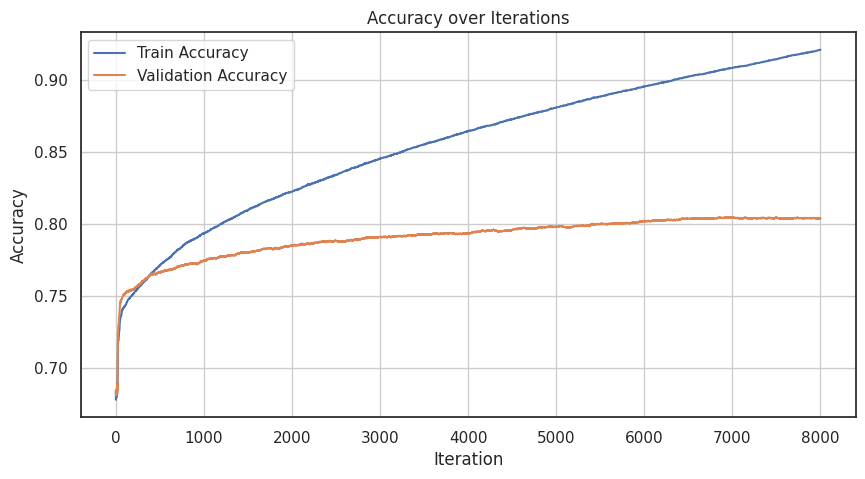

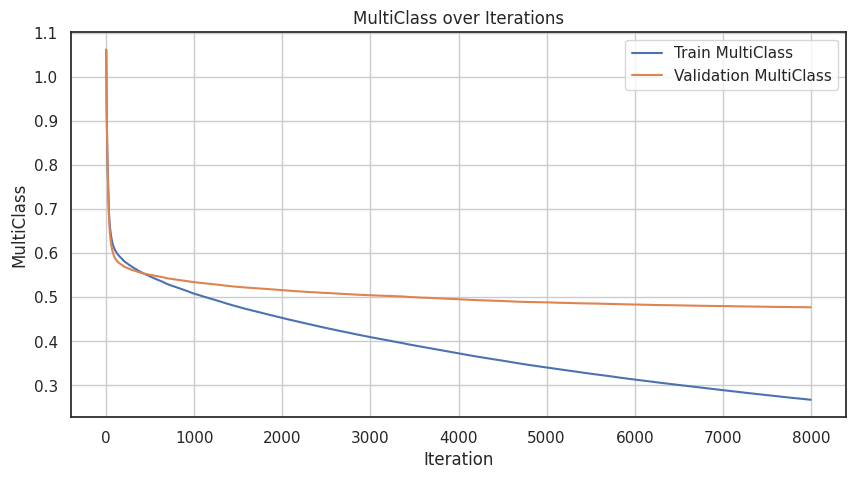

In [88]:
import matplotlib.pyplot as plt
evals_result = model.get_evals_result()
def plot_catboost_metrics(evals_result):
    for metric in evals_result['learn'].keys():
        plt.figure(figsize=(10, 5))
        plt.plot(evals_result['learn'][metric], label=f"Train {metric}")
        plt.plot(evals_result['validation'][metric], label=f"Validation {metric}")
        plt.xlabel("Iteration")
        plt.ylabel(metric)
        plt.title(f"{metric} over Iterations")
        plt.legend()
        plt.grid(True)
        plt.show()

plot_catboost_metrics(evals_result)


# Feature Importance

In [89]:
import pandas as pd

importances = model.get_feature_importance()
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                     Feature  Importance
8               Type_of_Loan      10.440
14          Outstanding_Debt       7.789
0                      Month       7.010
6              Interest_Rate       6.194
9        Delay_from_due_date       5.593
11      Changed_Credit_Limit       5.493
13                Credit_Mix       5.440
1                        Age       4.818
18       Total_EMI_per_month       4.627
16        Credit_History_Age       4.421
5            Num_Credit_Card       4.149
2              Annual_Income       3.892
10    Num_of_Delayed_Payment       3.369
4          Num_Bank_Accounts       3.067
3      Monthly_Inhand_Salary       3.058
21           Monthly_Balance       2.981
19   Amount_invested_monthly       2.892
12      Num_Credit_Inquiries       2.873
15  Credit_Utilization_Ratio       2.772
7                Num_of_Loan       2.476
20         Payment_Behaviour       1.931
28         Occupation_Lawyer       0.377
29        Occupation_Manager       0.339
35        Occupa

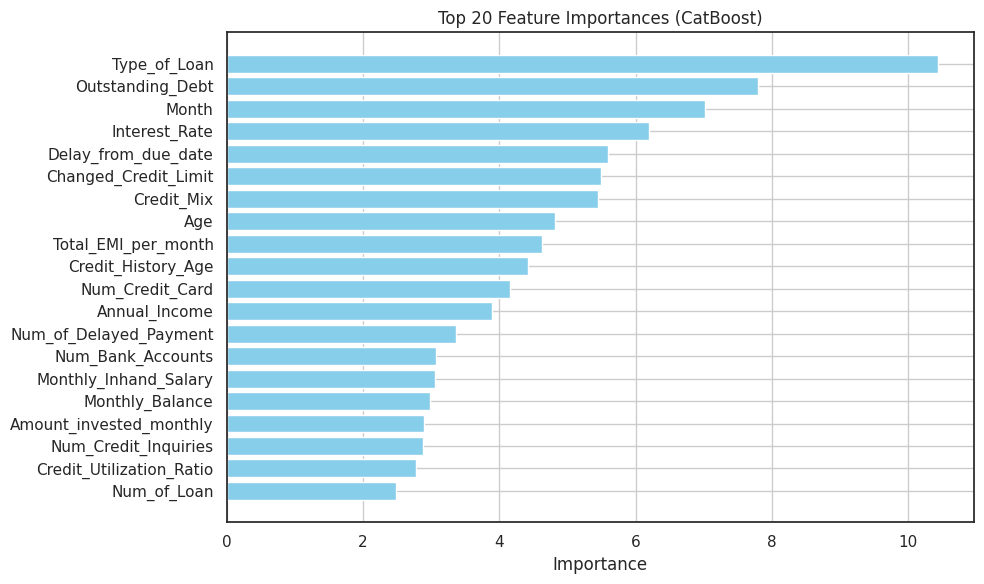

In [91]:
import matplotlib.pyplot as plt

top_n = 20
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances (CatBoost)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
